In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import zipfile
import lightgbm as lgb
import time

# set formatting
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 700)

In [2]:
def get_data(prod_id):
    df_orig = pd.read_csv(r"C:\Users\Vivek\Documents\meijer\\" + prod_id + ".csv.gz")
    return df_orig

def rename_cols(df_orig):
    rename_dict = {
       'ut_id' : 'store_id', 'p_id' : 'prod_id', 'day_dt' : 'date', 'mkt_bskt_ut_qt' : 'qty', 'adv_circ_flg' : 'adv_circ_flg', 
       'adv_mid_wk_flg' : 'adv_mid_wk_flg', 'adv_super_evnt_flg' : 'adv_super_evnt_flg', 'adv_dgtl_circ_flg' : 'adv_dgtl_circ_flg', 
       'unadv_flg' : 'adv_unadv_flg', 'pr_drop_flg' : 'adv_pr_drop_flg', 'p_ten_for_ten_flg' : 'adv_p_ten_for_ten_flg', 
       'ut_same_sto_flg' : 'ut_same_sto_flg', 'atl_min_temp_val' : 'weat_atl_min_temp_val', 'atl_mean_temp_val' : 'weat_atl_mean_temp_val', 
       'atl_max_temp_val' : 'weat_atl_max_temp_val', 'atl_t_ppt_qt' : 'weat_atl_t_ppt_qt', 'atl_t_snow_qt' : 'weat_atl_t_snow_qt', 
       'day_bef_ppt_temp_val' : 'weat_day_bef_ppt_temp_val', 'day_bef_snow_temp_val' : 'weat_day_bef_snow_temp_val', 
       'day_aft_ppt_temp_val' : 'weat_day_aft_ppt_temp_val', 'day_aft_snow_temp_val' : 'weat_day_aft_snow_temp_val', 
       'mpk_hook_flg' : 'mpk_hook_flg', 'mcc_hook_flg' : 'mcc_hook_flg', 'bucks_hook_flg' : 'bucks_hook_flg', 'other_hook_flg' : 'other_hook_flg', 
       'mpk_cpn_flg' : 'mpk_cpn_flg', 'sunprexmas' : 'hol_flg_sunprexmas', 'redsat' : 'hol_flg_redsat', 'blackfri' : 'hol_flg_blackfri', 
       'turkey' : 'hol_flg_turkey', 'saturdayb4turkey' : 'hol_flg_saturdayb4turkey', 'fridayb4turkey' : 'hol_flg_fridayb4turkey', 
       'veterans' : 'hol_flg_veterans', 'halloweenfri' : 'hol_flg_halloweenfri', 'halloween' : 'hol_flg_halloween', 
       'halloweeneve' : 'hol_flg_halloweeneve', 'prehalo_sun' : 'hol_flg_prehalo_sun', 'prehalo_fri' : 'hol_flg_prehalo_fri', 
       'columbus' : 'hol_flg_columbus', 'laborfri' : 'hol_flg_laborfri', 'laborsun' : 'hol_flg_laborsun', 'laborsat' : 'hol_flg_laborsat', 
       'laborwkend' : 'hol_flg_laborwkend', 'labor' : 'hol_flg_labor', 'dad' : 'hol_flg_dad', 'dadsat' : 'hol_flg_dadsat', 
       'memwkend' : 'hol_flg_memwkend', 'mom' : 'hol_flg_mom', 'momsat' : 'hol_flg_momsat', 'easterwk' : 'hol_flg_easterwk', 
       'easter' : 'hol_flg_easter', 'eastersat' : 'hol_flg_eastersat', 'presday' : 'hol_flg_presday', 'valentinewknd' : 
       'hol_flg_valentinewknd', 'valentine' : 'hol_flg_valentine', 'dayb4valentine' : 'hol_flg_dayb4valentine', 
       'superbowlsat' : 'hol_flg_superbowlsat', 'superbowl' : 'hol_flg_superbowl', 'mlk' : 'hol_flg_mlk', 'ny' : 'hol_flg_ny', 
       'julyfour' : 'hol_flg_julyfour', 'halloweenwkend' : 'hol_flg_halloweenwkend', 'dectwothree' : 'hol_flg_dectwothree', 
       'xmaseve' : 'hol_flg_xmaseve', 'satpny' : 'hol_flg_satpny', 'sunpny' : 'hol_flg_sunpny', 'memorial' : 'hol_flg_memorial', 
       'prehalo_sat' : 'hol_flg_prehalo_sat', 'turkeywed' : 'hol_flg_turkeywed', 'dectwosix' : 'hol_flg_dectwosix', 
       'mcc_blk_out' : 'hol_flg_mcc_blk_out', 'nyeve' : 'hol_flg_nyeve'
    }

    cols = ['store_id', 'prod_id', 'date', 'qty', 'adv_circ_flg', 'adv_mid_wk_flg', 'adv_super_evnt_flg', 
            'adv_dgtl_circ_flg', 'adv_unadv_flg', 'adv_pr_drop_flg', 'adv_p_ten_for_ten_flg', 
            'ut_same_sto_flg', 'weat_atl_min_temp_val', 'weat_atl_mean_temp_val', 'weat_atl_max_temp_val', 
            'weat_atl_t_ppt_qt', 'weat_atl_t_snow_qt', 'weat_day_bef_ppt_temp_val', 
            'weat_day_bef_snow_temp_val', 'weat_day_aft_ppt_temp_val', 'weat_day_aft_snow_temp_val', 
            'mpk_hook_flg', 'mcc_hook_flg', 'bucks_hook_flg', 'other_hook_flg', 'mpk_cpn_flg', 
            'hol_flg_sunprexmas', 'hol_flg_redsat', 'hol_flg_blackfri', 'hol_flg_turkey', 
            'hol_flg_saturdayb4turkey', 'hol_flg_fridayb4turkey', 'hol_flg_veterans', 
            'hol_flg_halloweenfri', 'hol_flg_halloween', 'hol_flg_halloweeneve', 'hol_flg_prehalo_sun', 
            'hol_flg_prehalo_fri', 'hol_flg_columbus', 'hol_flg_laborfri', 'hol_flg_laborsun', 
            'hol_flg_laborsat', 'hol_flg_laborwkend', 'hol_flg_labor', 'hol_flg_dad', 'hol_flg_dadsat', 
            'hol_flg_memwkend', 'hol_flg_mom', 'hol_flg_momsat', 'hol_flg_easterwk', 'hol_flg_easter', 
            'hol_flg_eastersat', 'hol_flg_presday', 'hol_flg_valentinewknd', 'hol_flg_valentine', 
            'hol_flg_dayb4valentine', 'hol_flg_superbowlsat', 'hol_flg_superbowl', 'hol_flg_mlk', 
            'hol_flg_ny', 'hol_flg_julyfour', 'hol_flg_halloweenwkend', 'hol_flg_dectwothree', 
            'hol_flg_xmaseve', 'hol_flg_satpny', 'hol_flg_sunpny', 'hol_flg_memorial', 
            'hol_flg_prehalo_sat', 'hol_flg_turkeywed', 'hol_flg_dectwosix', 'hol_flg_mcc_blk_out', 
            'hol_flg_nyeve']

    df = df_orig
    df.columns = df.columns.str.lower()
    df = df.rename(columns = rename_dict)
    df = df[cols]
    df['date'] = pd.to_datetime(df['date'])
    
    return df

In [3]:
def create_features(df):
    # create new date based cols part 1
    # idea to make it more modular: make 'date' a variable
    # optional 'dt_' prefix

    df['dt_days_from_2k'] = (df['date'] - pd.to_datetime('2000-01-01')).dt.days
    df['dt_week_of_month'] = df['date'].apply(lambda d: (d.day-1) // 7 + 1)
    df['dt_week_of_year'] = df['date'].dt.week
    df['dt_year'] = df['date'].dt.year
    df['dt_month'] = df['date'].dt.month
    df['dt_day_of_month'] = df['date'].dt.day
    df['dt_day_of_week'] = df['date'].dt.dayofweek
    df['dt_day_of_year'] = df['date'].dt.dayofyear

    # create new date based cols part 2
    # more modular: make function which returns '_sin', '_cos' cols given col_name
    # 366, 7, 53 should be determined using max of columns

    df['dt_day_of_year_sin'] = np.sin(2*np.pi*(df['dt_day_of_year']/366))
    df['dt_day_of_year_cos'] = np.cos(2*np.pi*(df['dt_day_of_year']/366))

    df['dt_day_of_week_sin'] = np.sin(2*np.pi*(df['dt_day_of_week']/7))
    df['dt_day_of_week_cos'] = np.cos(2*np.pi*(df['dt_day_of_week']/7))

    df['dt_week_of_year_sin'] = np.sin(2*np.pi*(df['dt_week_of_year']/53))
    df['dt_week_of_year_cos'] = np.cos(2*np.pi*(df['dt_week_of_year']/53))

    df['dt_day_of_month_sin'] = np.sin(2*np.pi*(df['dt_day_of_month']/31))
    df['dt_day_of_month_cos'] = np.cos(2*np.pi*(df['dt_day_of_month']/31))

    df['dt_month_sin'] = np.sin(2*np.pi*(df['dt_month']/12))
    df['dt_month_cos'] = np.cos(2*np.pi*(df['dt_month']/12))
    
    return df

In [4]:
# shuffle the dataframe rows

def shuffle_df(df):
    df = df.reindex(np.random.permutation(df.index))
    df = df.sort_values(by=['date'])
    
    return df

In [5]:
# functions to create lag variables, moving average variables, aggregate variables


def create_lag_vars(df, tgt_col, lags = [7, 14, 28, 56], grpby_cols = ['store_id']):
  grpby = df.groupby(grpby_cols)
  for lag in lags:
    new_col = tgt_col + '_' + 'lag' + '_' + str(lag)
    df[new_col] = grpby[tgt_col].shift(lag)
  
  return df


def create_lag_same_day_last_yr(df, tgt_col, month_col = 'dt_month', 
                            day_col = 'dt_day_of_month', grpby_cols = ['store_id']):
  grpby = df.groupby(grpby_cols + [month_col, day_col])
  new_col = tgt_col + '_' + 'lag_last_yr'
  df[new_col] = grpby[tgt_col].shift(1)
  
  return df


def create_ma_vars(df, tgt_col, lag = 7, windows = [4, 5, 7, 10, 14, 18, 30], grpby_cols = ['store_id']):
  grpby = df.groupby(grpby_cols)
  for window in windows:
    new_col = tgt_col + '_lag_' + str(lag) + '_ma_' + str(window)
    df[new_col] = grpby[tgt_col].shift(lag).rolling(window).mean()
  
  return df


def create_agg_vars(df, grpby_cols = ['date'], 
                    agg_ops = [('qty_mean_prod_dt', 'qty', np.mean), 
                               ('qty_median_prod_dt', 'qty', np.median),
                               ('stor_unique', 'store_id', pd.Series.nunique)]):
  grpby = df.groupby(grpby_cols)
  for col_name, tgt, agg_func in agg_ops:
    df_temp = grpby[tgt].agg(agg_func).reset_index().shift()
    df_temp.rename(columns={tgt:col_name}, inplace=True)
    df = pd.merge(df, df_temp, how='left', on=grpby_cols)
  
  return df

In [6]:
def create_all_lagged_features(df):
    df = create_lag_vars(df, tgt_col = 'qty')
    # df = create_lag_same_day_last_yr(df, tgt_col = 'qty')
    df = create_ma_vars(df, tgt_col = 'qty')
    df = create_agg_vars(df, grpby_cols=['date'])
    df = create_lag_vars(df, tgt_col = 'qty_mean_prod_dt')
    # df = create_agg_vars_v2(df)

    df = create_ma_vars(df, tgt_col = 'qty_mean_prod_dt')
    # df = create_ma_vars(df, tgt_col = 'qty_mean_day_of_wk_mth')
    # df.head()

    df = create_lag_vars(df, tgt_col = 'qty_mean_prod_dt')
    df = create_lag_vars(df, tgt_col = 'qty_median_prod_dt')

    return df

In [16]:
# dummy vars function, transforming y, creating train_test, and calucalting SMAPE

def create_dummies(df):
    dummy_cols = ['store_id', 'dt_week_of_month', 'dt_week_of_year', 'dt_month', 
                  'dt_day_of_month', 'dt_day_of_week', 'ut_same_sto_flg']
    df_dummy = pd.get_dummies(df, columns = dummy_cols, prefix = dummy_cols, dummy_na=True)
    
    return df_dummy

def transform_y(df_dummy):
    df_dummy['qty_log_1p'] = np.log1p(df_dummy['qty'].values)
    df_dummy['qty_capped_8'] = df_dummy['qty'].apply(lambda x: 8 if x >= 8 else x)
    
    return df_dummy

def create_train_test(df_dummy):
    train = df_dummy[(df_dummy['date']>='2015-03-02') & (df_dummy['date']<='2018-10-02')]
    test = df_dummy[(df_dummy['date']>'2018-10-02')]
    
    return (train, test)

def smape(preds, target):
    '''
    Function to calculate SMAPE
    '''
    n = len(preds)
    masked_arr = ~((preds==0)&(target==0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def lgbm_smape(preds, train_data):
    '''
    Custom Evaluation Function for LGBM
    '''
    labels = train_data.get_label()
#     smape_val = smape(np.expm1(preds), np.expm1(labels))
    smape_val = smape(preds, labels)
    return 'SMAPE', smape_val, False




In [45]:
# cycle through dir and find appropriate data files

import os
prod_list = []
for file in os.listdir("./Bucket 4/"):
    if file.endswith(".csv.gz"):
        prod_list.append(os.path.join(file)[:-7])
        print(os.path.join(file)[:-7])

bucket_4_472556
bucket_4_472875
bucket_4_473137
bucket_4_473658
bucket_4_473772
bucket_4_474845
bucket_4_475037
bucket_4_476385
bucket_4_476662
bucket_4_477591
bucket_4_478125
bucket_4_479709
bucket_4_480318
bucket_4_480374
bucket_4_480461
bucket_4_481228
bucket_4_482173
bucket_4_482329
bucket_4_482760
bucket_4_484290
bucket_4_484597
bucket_4_484987
bucket_4_486076
bucket_4_486668
bucket_4_489369
bucket_4_489608
bucket_4_489660


In [46]:
prod_list

['bucket_4_472556',
 'bucket_4_472875',
 'bucket_4_473137',
 'bucket_4_473658',
 'bucket_4_473772',
 'bucket_4_474845',
 'bucket_4_475037',
 'bucket_4_476385',
 'bucket_4_476662',
 'bucket_4_477591',
 'bucket_4_478125',
 'bucket_4_479709',
 'bucket_4_480318',
 'bucket_4_480374',
 'bucket_4_480461',
 'bucket_4_481228',
 'bucket_4_482173',
 'bucket_4_482329',
 'bucket_4_482760',
 'bucket_4_484290',
 'bucket_4_484597',
 'bucket_4_484987',
 'bucket_4_486076',
 'bucket_4_486668',
 'bucket_4_489369',
 'bucket_4_489608',
 'bucket_4_489660']

In [51]:
train_x.head()

,store_id,adv_circ_flg,adv_mid_wk_flg,adv_super_evnt_flg,adv_dgtl_circ_flg,adv_unadv_flg,adv_pr_drop_flg,adv_p_ten_for_ten_flg,weat_atl_min_temp_val,weat_atl_mean_temp_val,weat_atl_max_temp_val,weat_atl_t_ppt_qt,weat_atl_t_snow_qt,weat_day_bef_ppt_temp_val,weat_day_bef_snow_temp_val,weat_day_aft_ppt_temp_val,weat_day_aft_snow_temp_val,mpk_hook_flg,mcc_hook_flg,bucks_hook_flg,other_hook_flg,mpk_cpn_flg,hol_flg_sunprexmas,hol_flg_redsat,hol_flg_blackfri,hol_flg_turkey,hol_flg_saturdayb4turkey,hol_flg_fridayb4turkey,hol_flg_veterans,hol_flg_halloweenfri,hol_flg_halloween,hol_flg_halloweeneve,hol_flg_prehalo_sun,hol_flg_prehalo_fri,hol_flg_columbus,hol_flg_laborfri,hol_flg_laborsun,hol_flg_laborsat,hol_flg_laborwkend,hol_flg_labor,hol_flg_dad,hol_flg_dadsat,hol_flg_memwkend,hol_flg_mom,hol_flg_momsat,hol_flg_easterwk,hol_flg_easter,hol_flg_eastersat,hol_flg_presday,hol_flg_valentinewknd,hol_flg_valentine,hol_flg_dayb4valentine,hol_flg_superbowlsat,hol_flg_superbowl,hol_flg_mlk,hol_flg_ny,hol_flg_julyfour,hol_flg_halloweenwkend,hol_flg_dectwothree,hol_flg_xmaseve,hol_flg_satpny,hol_flg_sunpny,hol_flg_memorial,hol_flg_prehalo_sat,hol_flg_turkeywed,hol_flg_dectwosix,hol_flg_mcc_blk_out,hol_flg_nyeve,dt_week_of_month,dt_week_of_year,dt_month,dt_day_of_month,dt_day_of_week,dt_day_of_year,dt_day_of_year_sin,dt_day_of_year_cos,dt_day_of_week_sin,dt_day_of_week_cos,dt_week_of_year_sin,dt_week_of_year_cos,dt_day_of_month_sin,dt_day_of_month_cos,dt_month_sin,dt_month_cos,qty_lag_7,qty_lag_14,qty_lag_28,qty_lag_56,qty_lag_7_ma_4,qty_lag_7_ma_5,qty_lag_7_ma_7,qty_lag_7_ma_10,qty_lag_7_ma_14,qty_lag_7_ma_18,qty_lag_7_ma_30,qty_mean_prod_dt_lag_7,qty_mean_prod_dt_lag_14,qty_mean_prod_dt_lag_28,qty_mean_prod_dt_lag_56,qty_mean_prod_dt_lag_7_ma_4,qty_mean_prod_dt_lag_7_ma_5,qty_mean_prod_dt_lag_7_ma_7,qty_mean_prod_dt_lag_7_ma_10,qty_mean_prod_dt_lag_7_ma_14,qty_mean_prod_dt_lag_7_ma_18,qty_mean_prod_dt_lag_7_ma_30,qty_median_prod_dt_lag_7,qty_median_prod_dt_lag_14,qty_median_prod_dt_lag_28,qty_median_prod_dt_lag_56
521,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.9,21.45,30.0,0.0,0.1,0.25,2.9,0.01,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10,3,2,0,61,0.866025,0.5,0.0,1.0,0.92669,0.375828,0.394356,0.918958,1.0,6.123234e-17,0.0,0.0,0.0,0.0,2.25,1.8,1.285714,1.3,1.000000,0.944444,0.800000,0.1,0.6,0.333333,0.25,1.0,1.06,1.128571,1.18,1.021429,0.883333,0.78,0.0,0.0,0.0,0.0
522,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,17.50,28.0,0.0,0.0,0.08,0.2,0.24,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10,3,2,0,61,0.866025,0.5,0.0,1.0,0.92669,0.375828,0.394356,0.918958,1.0,6.123234e-17,1.0,1.0,0.0,1.0,1.00,2.0,1.428571,1.1,1.071429,1.000000,0.833333,0.1,0.6,0.333333,0.25,0.7,0.82,0.957143,1.06,1.000000,0.866667,0.76,0.0,0.0,0.0,0.0
523,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.1,22.55,30.0,0.0,0.0,0.32,0.0,0.40,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10,3,2,0,61,0.866025,0.5,0.0,1.0,0.92669,0.375828,0.394356,0.918958,1.0,6.123234e-17,0.0,0.0,0.0,0.0,0.50,0.8,1.428571,1.0,1.071429,0.888889,0.833333,0.1,0.6,0.333333,0.25,0.4,0.58,0.785714,0.94,0.978571,0.850000,0.74,0.0,0.0,0.0,0.0
524,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1,20.05,32.0,0.0,0.0,0.05,0.1,0.07,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10,3,2,0,61,0.866025,0.5,0.0,1.0,0.92669,0.375828,0.394356,0.918958,1.0,6.123234e-17,0.0,1.0,1.0,0.0,0.25,0.4,1.428571,1.0,1.000000,

In [47]:
# main data loop which goes through each product, builds LGBM model and generates error metrics

for prod_id in prod_list:
    
    print('prod:' + prod_id + ' started...')
    
    if os.path.isfile(prod_id + '_results.csv'):
        print('prod:' + prod_id + ' results file exists - skip...')
        continue
    df_orig = get_data(prod_id)
    df = rename_cols(df_orig)
    print('prod:' + prod_id + ' loaded & renamed dataset...')
    print(df.date.min(), df.date.max())
    if not ((df.date.min() == pd.to_datetime('2015-01-02')) and (df.date.max() == pd.to_datetime('2018-12-22'))):
        print('prod:' + prod_id + 'dates not correctly bounded...')
        continue

    df = create_features(df)
    df = shuffle_df(df)
    print('prod:' + prod_id + ' created features and shuffled...')
    df = create_all_lagged_features(df)
    df_dummies = create_dummies(df)
    df_dummies = transform_y(df)
    
    print('prod:' + prod_id + ' created dummies & transformed y...')

    train, test = create_train_test(df_dummies)

    no_cols = ['prod_id', 'date', 'qty', 'dt_days_from_2k', 'dt_year', 'qty_mean_prod_dt',
               'qty_median_prod_dt', 'stor_unique', 'qty_log_1p', 'qty_capped_8', 'ut_same_sto_flg']

    cols = [col for col in train.columns if col not in no_cols]

    train_x = train[[col for col in train.columns if col not in no_cols]]
    train_y = train[['date', 'qty']]
    test_x = test[[col for col in test.columns if col not in no_cols]]
    test_y = test[['date', 'qty']]

    train_x_val = train_x.values
    train_y_val = (train_y['qty'] + 1).values
    test_x_val = test_x.values
    test_y_val = (test_y['qty'] + 1).values

    # Creating lgbtrain & lgbval
    lgbtrain = lgb.Dataset(data=train_x_val, label=train_y_val, 
                           feature_name=cols)
    lgbval = lgb.Dataset(data=test_x_val, label=test_y_val, 
                         reference=lgbtrain, feature_name=cols)

    print('prod:' + prod_id + ' created lgbm datasets...')
    
    lgb_params = {'task':'train', 'boosting_type':'gbdt', 'objective':'regression', 
                  'metric': {'rmse'}, 'num_leaves': 60, 'learning_rate': 0.005, 
                  'feature_fraction': 0.7, 'max_depth': 12, 'verbose': 0, 
                  'num_boost_round':1500, 'early_stopping_rounds':200, 'nthread':-1,
                  'min_data_in_leaf': 5}

    def lgb_validation(params, lgbtrain, lgbval, X_val, Y_val, verbose_eval):
        t0 = time.time()
        evals_result = {}
        model = lgb.train(params, lgbtrain, num_boost_round=params['num_boost_round'], 
                          valid_sets=[lgbtrain, lgbval], feval=lgbm_smape, 
                          early_stopping_rounds=params['early_stopping_rounds'], 
                          evals_result=evals_result, verbose_eval=verbose_eval)
        print(model.best_iteration)
        print('Total time taken to build the model: ', (time.time()-t0)/60, 'minutes!!')
        pred_Y_val = model.predict(X_val, num_iteration=model.best_iteration)
        pred_Y_val = (pred_Y_val)
        Y_val = (Y_val)
        val_df = pd.DataFrame(columns=['true_Y_val','pred_Y_val'])
        val_df['pred_Y_val'] = pred_Y_val
        val_df['true_Y_val'] = Y_val
        print(val_df.shape)
        print(val_df.sample(5))
        print('SMAPE for validation data is:{}'.format(smape(pred_Y_val, Y_val)))

        return model, val_df

    # Training lightgbm model and validating
    model, val_df = lgb_validation(lgb_params, lgbtrain, lgbval, test_x_val, 
                                   test_y_val, verbose_eval=5000)


    print('prod:' + prod_id + ' model trained...')
    
    pred_rows = df_dummies[(df_dummies['date']>'2018-10-02')].shape[0]
    stores = df.iloc[-pred_rows:].store_id.reset_index(drop=True)
    errors = pd.concat([stores, val_df], axis='columns')
    errors['prod_id'] = prod_id

    write_df = errors.groupby(['store_id', 'prod_id']).apply(lambda x: smape(x['pred_Y_val'], x['true_Y_val'])).reset_index().rename(columns={0:'smape'})
    
    print('prod:' + prod_id + ' writing results...')
    write_df.to_csv(prod_id + '_results.csv', index=False)
    
    print('prod:' + prod_id + ' done...')

print('All products done!')

prod:bucket_4_472556 started...
prod:bucket_4_472556 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_472556 created features and shuffled...
prod:bucket_4_472556 created dummies & transformed y...
prod:bucket_4_472556 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[425]	training's rmse: 1.09811	training's SMAPE: 36.0914	valid_1's rmse: 1.31578	valid_1's SMAPE: 38.4541
425
Total time taken to build the model:  0.11063334544499716 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
341         1.0    1.337435
788         1.0    1.278631
318         1.0    1.333821
508         1.0    1.317324
528         1.0    1.307049
SMAPE for validation data is:38.45407384543719
prod:bucket_4_472556 model trained...
prod:bucket_4_472556 writing results...
prod:bucket_4_472556 done...
prod:bucket_4_472875 started...
prod:bucket_4_472875 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_472875 created features and shuffled...
prod:bucket_4_472875 created dummies & transformed y...
prod:bucket_4_472875 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[832]	training's rmse: 0.729548	training's SMAPE: 30.7364	valid_1's rmse: 1.12973	valid_1's SMAPE: 33.3014
832
Total time taken to build the model:  0.21198341846466065 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
100         2.0    2.773007
335         5.0    3.900114
375         2.0    3.516924
303         2.0    1.437559
619         1.0    1.366499
SMAPE for validation data is:33.30141835927363
prod:bucket_4_472875 model trained...
prod:bucket_4_472875 writing results...
prod:bucket_4_472875 done...
prod:bucket_4_473137 started...
prod:bucket_4_473137 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_473137 created features and shuffled...
prod:bucket_4_473137 created dummies & transformed y...
prod:bucket_4_473137 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[672]	training's rmse: 0.675893	training's SMAPE: 28.0598	valid_1's rmse: 0.693931	valid_1's SMAPE: 29.6094
672
Total time taken to build the model:  0.19396675030390423 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
564         1.0    1.267045
316         1.0    1.364710
72          1.0    1.230857
250         2.0    2.624289
691         3.0    2.665079
SMAPE for validation data is:29.609393451012494
prod:bucket_4_473137 model trained...
prod:bucket_4_473137 writing results...
prod:bucket_4_473137 done...
prod:bucket_4_473658 started...
prod:bucket_4_473658 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_473658 created features and shuffled...
prod:bucket_4_473658 created dummies & transformed y...
prod:bucket_4_473658 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[657]	training's rmse: 1.01229	training's SMAPE: 31.7611	valid_1's rmse: 1.02165	valid_1's SMAPE: 33.8465
657
Total time taken to build the model:  0.17296656370162963 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
760         1.0    1.545336
75          1.0    1.520900
240         1.0    1.419071
453         3.0    3.143457
354         1.0    1.191124
SMAPE for validation data is:33.846508488256944
prod:bucket_4_473658 model trained...
prod:bucket_4_473658 writing results...
prod:bucket_4_473658 done...
prod:bucket_4_473772 started...
prod:bucket_4_473772 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_473772 created features and shuffled...
prod:bucket_4_473772 created dummies & transformed y...
prod:bucket_4_473772 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[332]	training's rmse: 1.10637	training's SMAPE: 39.0201	valid_1's rmse: 1.11866	valid_1's SMAPE: 41.5055
332
Total time taken to build the model:  0.08923327922821045 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
794         1.0    1.546367
755         1.0    1.569414
778         2.0    1.688925
279         1.0    1.580323
122         1.0    1.508977
SMAPE for validation data is:41.50547563953914
prod:bucket_4_473772 model trained...
prod:bucket_4_473772 writing results...
prod:bucket_4_473772 done...
prod:bucket_4_474845 started...
prod:bucket_4_474845 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_474845 created features and shuffled...
prod:bucket_4_474845 created dummies & transformed y...
prod:bucket_4_474845 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[569]	training's rmse: 0.56333	training's SMAPE: 22.2928	valid_1's rmse: 0.854827	valid_1's SMAPE: 30.0622
569
Total time taken to build the model:  0.15876681407292684 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
3           1.0    1.270421
70          1.0    1.234916
142         1.0    1.263491
343         2.0    1.272473
389         1.0    1.344427
SMAPE for validation data is:30.062172342420833
prod:bucket_4_474845 model trained...
prod:bucket_4_474845 writing results...
prod:bucket_4_474845 done...
prod:bucket_4_475037 started...
prod:bucket_4_475037 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_475037 created features and shuffled...
prod:bucket_4_475037 created dummies & transformed y...
prod:bucket_4_475037 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.

C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Early stopping, best iteration is:
[6]	training's rmse: 0.402549	training's SMAPE: 14.0605	valid_1's rmse: 0.38832	valid_1's SMAPE: 13.7203
6
Total time taken to build the model:  0.041133288542429605 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
165         1.0    1.101296
62          1.0    1.104256
582         1.0    1.101428
476         1.0    1.099980
649         3.0    1.103125
SMAPE for validation data is:13.720304353523797
prod:bucket_4_475037 model trained...
prod:bucket_4_475037 writing results...
prod:bucket_4_475037 done...
prod:bucket_4_476385 started...
prod:bucket_4_476385 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_476385 created features and shuffled...
prod:bucket_4_476385 created dummies & transformed y...
prod:bucket_4_476385 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[186]	training's rmse: 1.57094	training's SMAPE: 51.1532	valid_1's rmse: 1.67061	valid_1's SMAPE: 56.7969
186
Total time taken to build the model:  0.08731669187545776 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
734         1.0    1.683433
329         1.0    2.031749
175         3.0    1.805776
785         1.0    1.688583
38          2.0    1.922312
SMAPE for validation data is:56.79694374397739
prod:bucket_4_476385 model trained...
prod:bucket_4_476385 writing results...
prod:bucket_4_476385 done...
prod:bucket_4_476662 started...
prod:bucket_4_476662 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_476662 created features and shuffled...
prod:bucket_4_476662 created dummies & transformed y...
prod:bucket_4_476662 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[649]	training's rmse: 1.03542	training's SMAPE: 34.0708	valid_1's rmse: 1.28028	valid_1's SMAPE: 41.847
649
Total time taken to build the model:  0.1226331392923991 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
756         1.0    1.498593
606         1.0    1.384817
584         1.0    1.400761
354         1.0    1.236011
575         2.0    2.263914
SMAPE for validation data is:41.84699032085691
prod:bucket_4_476662 model trained...
prod:bucket_4_476662 writing results...
prod:bucket_4_476662 done...
prod:bucket_4_477591 started...
prod:bucket_4_477591 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_477591 created features and shuffled...
prod:bucket_4_477591 created dummies & transformed y...
prod:bucket_4_477591 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[1048]	training's rmse: 0.438978	training's SMAPE: 19.9034	valid_1's rmse: 0.623856	valid_1's SMAPE: 23.195
1048
Total time taken to build the model:  0.22715001900990803 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
260         1.0    1.133286
582         1.0    1.229278
115         1.0    2.211330
614         2.0    2.699658
243         1.0    1.151956
SMAPE for validation data is:23.19495308277056
prod:bucket_4_477591 model trained...
prod:bucket_4_477591 writing results...
prod:bucket_4_477591 done...
prod:bucket_4_478125 started...
prod:bucket_4_478125 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_478125 created features and shuffled...
prod:bucket_4_478125 created dummies & transformed y...
prod:bucket_4_478125 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[557]	training's rmse: 0.388815	training's SMAPE: 10.2539	valid_1's rmse: 0.480136	valid_1's SMAPE: 13.3345
557
Total time taken to build the model:  0.09518336852391561 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
141         1.0    1.121768
100         2.0    1.404294
468         1.0    1.061605
26          1.0    1.272624
797         1.0    1.091351
SMAPE for validation data is:13.334506026765837
prod:bucket_4_478125 model trained...
prod:bucket_4_478125 writing results...
prod:bucket_4_478125 done...
prod:bucket_4_479709 started...
prod:bucket_4_479709 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_479709 created features and shuffled...
prod:bucket_4_479709 created dummies & transformed y...
prod:bucket_4_479709 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Did not meet early stopping. Best iteration is:
[1500]	training's rmse: 0.452975	training's SMAPE: 19.3993	valid_1's rmse: 0.741248	valid_1's SMAPE: 23.6209
1500
Total time taken to build the model:  0.24508334398269654 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
704         1.0    1.044554
583         1.0    1.173581
784         1.0    1.092852
359         2.0    1.284182
747         1.0    1.199044
SMAPE for validation data is:23.62091100280319
prod:bucket_4_479709 model trained...
prod:bucket_4_479709 writing results...
prod:bucket_4_479709 done...
prod:bucket_4_480318 started...
prod:bucket_4_480318 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_480318 created features and shuffled...
prod:bucket_4_480318 created dummies & transformed y...
prod:bucket_4_480318 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[337]	training's rmse: 0.681269	training's SMAPE: 29.7689	valid_1's rmse: 0.854134	valid_1's SMAPE: 35.3263
337
Total time taken to build the model:  0.12031712134679158 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
563         1.0    1.814873
269         1.0    1.313948
95          1.0    1.209967
440         1.0    1.275338
297         1.0    1.273690
SMAPE for validation data is:35.32631847062933
prod:bucket_4_480318 model trained...
prod:bucket_4_480318 writing results...
prod:bucket_4_480318 done...
prod:bucket_4_480374 started...
prod:bucket_4_480374 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_480374 created features and shuffled...
prod:bucket_4_480374 created dummies & transformed y...
prod:bucket_4_480374 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[545]	training's rmse: 0.494035	training's SMAPE: 9.67098	valid_1's rmse: 0.613007	valid_1's SMAPE: 16.1452
545
Total time taken to build the model:  0.1227666695912679 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
352         1.0    1.228153
161         1.0    1.100093
523         1.0    1.043937
486         1.0    1.071214
5           1.0    1.104289
SMAPE for validation data is:16.14522080545385
prod:bucket_4_480374 model trained...
prod:bucket_4_480374 writing results...
prod:bucket_4_480374 done...
prod:bucket_4_480461 started...
prod:bucket_4_480461 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_480461 created features and shuffled...
prod:bucket_4_480461 created dummies & transformed y...
prod:bucket_4_480461 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[386]	training's rmse: 0.682552	training's SMAPE: 28.0556	valid_1's rmse: 0.692726	valid_1's SMAPE: 29.9238
386
Total time taken to build the model:  0.11699978907903036 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
388         2.0    1.351976
567         1.0    1.194853
103         1.0    1.218666
278         1.0    1.471740
670         1.0    1.239942
SMAPE for validation data is:29.923769100481433
prod:bucket_4_480461 model trained...
prod:bucket_4_480461 writing results...
prod:bucket_4_480461 done...
prod:bucket_4_481228 started...
prod:bucket_4_481228 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_481228 created features and shuffled...
prod:bucket_4_481228 created dummies & transformed y...
prod:bucket_4_481228 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[495]	training's rmse: 0.746835	training's SMAPE: 28.0374	valid_1's rmse: 1.44459	valid_1's SMAPE: 44.617
495
Total time taken to build the model:  0.12194954554239909 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
148         1.0    1.114988
235         2.0    1.726891
620         1.0    1.696430
11          1.0    2.071477
619         1.0    1.224022
SMAPE for validation data is:44.61698414089761
prod:bucket_4_481228 model trained...
prod:bucket_4_481228 writing results...
prod:bucket_4_481228 done...
prod:bucket_4_482173 started...
prod:bucket_4_482173 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_482173 created features and shuffled...
prod:bucket_4_482173 created dummies & transformed y...
prod:bucket_4_482173 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[717]	training's rmse: 0.380542	training's SMAPE: 8.84683	valid_1's rmse: 0.501083	valid_1's SMAPE: 12.3448
717
Total time taken to build the model:  0.12233341137568156 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
786         1.0    1.089984
806         1.0    1.045809
808         1.0    1.193936
0           1.0    1.063621
694         1.0    1.043565
SMAPE for validation data is:12.344820485541828
prod:bucket_4_482173 model trained...
prod:bucket_4_482173 writing results...
prod:bucket_4_482173 done...
prod:bucket_4_482329 started...
prod:bucket_4_482329 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_482329 created features and shuffled...
prod:bucket_4_482329 created dummies & transformed y...
prod:bucket_4_482329 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[867]	training's rmse: 0.652168	training's SMAPE: 24.0713	valid_1's rmse: 0.829651	valid_1's SMAPE: 28.9324
867
Total time taken to build the model:  0.15255004564921062 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
347         1.0    1.160809
125         3.0    2.927549
237         2.0    2.924751
706         1.0    1.182063
566         1.0    1.185303
SMAPE for validation data is:28.93235381347283
prod:bucket_4_482329 model trained...
prod:bucket_4_482329 writing results...
prod:bucket_4_482329 done...
prod:bucket_4_482760 started...
prod:bucket_4_482760 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_482760 created features and shuffled...
prod:bucket_4_482760 created dummies & transformed y...
prod:bucket_4_482760 created lgbm datasets...


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[249]	training's rmse: 1.10811	training's SMAPE: 39.0809	valid_1's rmse: 0.930182	valid_1's SMAPE: 41.2546
249
Total time taken to build the model:  0.06601614952087402 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
218         2.0    1.423790
15          1.0    1.424419
178         1.0    2.412516
22          1.0    1.502462
308         1.0    1.392416
SMAPE for validation data is:41.25462852417676
prod:bucket_4_482760 model trained...
prod:bucket_4_482760 writing results...
prod:bucket_4_482760 done...
prod:bucket_4_484290 started...
prod:bucket_4_484290 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_484290 created features and shuffled...
prod:bucket_4_484290 created dummies & transformed y...
prod:bucket_4_484290 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[425]	training's rmse: 0.837734	training's SMAPE: 37.3153	valid_1's rmse: 0.719635	valid_1's SMAPE: 37.6424
425
Total time taken to build the model:  0.09491663773854574 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
98          3.0    2.773268
139         1.0    1.682826
488         1.0    1.347473
282         2.0    1.628656
18          1.0    1.384862
SMAPE for validation data is:37.64238428036891
prod:bucket_4_484290 model trained...
prod:bucket_4_484290 writing results...
prod:bucket_4_484290 done...
prod:bucket_4_484597 started...
prod:bucket_4_484597 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_484597 created features and shuffled...
prod:bucket_4_484597 created dummies & transformed y...
prod:bucket_4_484597 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[6]	training's rmse: 0.891589	training's SMAPE: 41.0019	valid_1's rmse: 0.722458	valid_1's SMAPE: 39.7803
6
Total time taken to build the model:  0.033416720231374104 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
318         1.0    1.472686
607         1.0    1.473934
728         1.0    1.472228
463         1.0    1.472558
111         3.0    1.473930
SMAPE for validation data is:39.780279742812304
prod:bucket_4_484597 model trained...
prod:bucket_4_484597 writing results...
prod:bucket_4_484597 done...
prod:bucket_4_484987 started...
prod:bucket_4_484987 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_484987 created features and shuffled...
prod:bucket_4_484987 created dummies & transformed y...
prod:bucket_4_484987 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[879]	training's rmse: 0.768464	training's SMAPE: 33.4133	valid_1's rmse: 1.10383	valid_1's SMAPE: 39.0711
879
Total time taken to build the model:  0.17951656579971315 minutes!!
(729, 2)
     true_Y_val  pred_Y_val
667         1.0    1.307001
596         4.0    2.950469
38          1.0    1.314885
530         7.0    1.271291
149         2.0    2.970537
SMAPE for validation data is:39.07113652368814
prod:bucket_4_484987 model trained...
prod:bucket_4_484987 writing results...
prod:bucket_4_484987 done...
prod:bucket_4_486076 started...
prod:bucket_4_486076 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_486076 created features and shuffled...
prod:bucket_4_486076 created dummies & transformed y...
prod:bucket_4_486076 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.

C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Early stopping, best iteration is:
[206]	training's rmse: 0.67047	training's SMAPE: 31.8359	valid_1's rmse: 0.617852	valid_1's SMAPE: 32.8237
206
Total time taken to build the model:  0.06421670516331991 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
685         3.0    1.321046
248         3.0    1.274257
158         2.0    1.271765
686         2.0    1.269645
481         1.0    1.262744
SMAPE for validation data is:32.82371821696905
prod:bucket_4_486076 model trained...
prod:bucket_4_486076 writing results...
prod:bucket_4_486076 done...
prod:bucket_4_486668 started...
prod:bucket_4_486668 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_486668 created features and shuffled...
prod:bucket_4_486668 created dummies & transformed y...
prod:bucket_4_486668 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[894]	training's rmse: 0.547116	training's SMAPE: 18.6827	valid_1's rmse: 0.740221	valid_1's SMAPE: 23.8882
894
Total time taken to build the model:  0.1405833125114441 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
594         2.0    3.137486
385         1.0    1.432342
80          1.0    1.105019
274         1.0    1.096797
174         1.0    1.140262
SMAPE for validation data is:23.88816468847808
prod:bucket_4_486668 model trained...
prod:bucket_4_486668 writing results...
prod:bucket_4_486668 done...
prod:bucket_4_489369 started...
prod:bucket_4_489369 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_489369 created features and shuffled...
prod:bucket_4_489369 created dummies & transformed y...
prod:bucket_4_489369 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[425]	training's rmse: 1.02645	training's SMAPE: 35.8498	valid_1's rmse: 1.05594	valid_1's SMAPE: 38.1231
425
Total time taken to build the model:  0.08564993937810263 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
680         1.0    1.364378
193         3.0    2.995180
664         2.0    2.025749
491         2.0    1.533589
202         1.0    1.460748
SMAPE for validation data is:38.12307923953335
prod:bucket_4_489369 model trained...
prod:bucket_4_489369 writing results...
prod:bucket_4_489369 done...
prod:bucket_4_489608 started...
prod:bucket_4_489608 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_489608 created features and shuffled...
prod:bucket_4_489608 created dummies & transformed y...
prod:bucket_4_489608 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[294]	training's rmse: 0.852758	training's SMAPE: 38.4154	valid_1's rmse: 0.802564	valid_1's SMAPE: 40.2295
294
Total time taken to build the model:  0.07128332058588664 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
526         1.0    2.070359
426         1.0    1.449860
487         1.0    1.438000
782         2.0    1.578610
659         1.0    1.710793
SMAPE for validation data is:40.229510887678224
prod:bucket_4_489608 model trained...
prod:bucket_4_489608 writing results...
prod:bucket_4_489608 done...
prod:bucket_4_489660 started...
prod:bucket_4_489660 loaded & renamed dataset...
2015-01-02 00:00:00 2018-12-22 00:00:00
prod:bucket_4_489660 created features and shuffled...
prod:bucket_4_489660 created dummies & transformed y...
prod:bucket_4_489660 created lgbm datasets...
Training until validation scores don't improve for 200 rounds.


C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Vivek\Anaconda3\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[1098]	training's rmse: 0.623882	training's SMAPE: 27.1893	valid_1's rmse: 0.556589	valid_1's SMAPE: 25.5173
1098
Total time taken to build the model:  0.21304994821548462 minutes!!
(810, 2)
     true_Y_val  pred_Y_val
724         1.0    1.830256
776         1.0    1.152980
62          1.0    1.155137
455         2.0    1.215087
105         1.0    1.601215
SMAPE for validation data is:25.51726215578721
prod:bucket_4_489660 model trained...
prod:bucket_4_489660 writing results...
prod:bucket_4_489660 done...
All products done!


In [48]:
import os
results_file = []
for file in os.listdir("."):
    if file.endswith("_results.csv"):
        results_file.append(file)

print(results_file)

['bucket_1_476804_results.csv', 'bucket_1_477646_results.csv', 'bucket_1_477846_results.csv', 'bucket_1_481934_results.csv', 'bucket_1_489702_results.csv', 'bucket_1_490007_results.csv', 'bucket_1_490446_results.csv', 'bucket_1_490696_results.csv', 'bucket_1_490993_results.csv', 'bucket_1_494129_results.csv', 'bucket_1_494130_results.csv', 'bucket_2_472182_results.csv', 'bucket_2_472642_results.csv', 'bucket_2_473659_results.csv', 'bucket_2_475655_results.csv', 'bucket_2_476025_results.csv', 'bucket_2_476090_results.csv', 'bucket_2_477426_results.csv', 'bucket_2_478178_results.csv', 'bucket_2_480263_results.csv', 'bucket_2_481021_results.csv', 'bucket_2_481058_results.csv', 'bucket_2_481117_results.csv', 'bucket_2_481673_results.csv', 'bucket_2_481930_results.csv', 'bucket_2_485419_results.csv', 'bucket_2_488819_results.csv', 'bucket_2_489034_results.csv', 'bucket_2_490775_results.csv', 'bucket_3_471921_results.csv', 'bucket_3_471951_results.csv', 'bucket_3_472151_results.csv', 'bucket

In [49]:
df_from_each_file = (pd.read_csv(f) for f in results_file)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df['bucket'] = concatenated_df['prod_id'].str[:8]
concatenated_df.head(400)

,store_id,prod_id,smape,bucket
0,109,bucket_1_476804,48.668318,bucket_1
1,111,bucket_1_476804,43.181126,bucket_1
2,112,bucket_1_476804,47.963395,bucket_1
3,113,bucket_1_476804,40.815775,bucket_1
4,115,bucket_1_476804,47.849003,bucket_1
5,116,bucket_1_476804,35.335400,bucket_1
6,117,bucket_1_476804,42.026889,bucket_1
7,118,bucket_1_476804,45.787990,bucket_1
8,119,bucket_1_476804,45.418733,bucket_1
9,120,bucket_1_476804,45.669156,bucket_1


In [50]:
concatenated_df.to_csv('results_all_buckets.csv', index=False)

Text(0.5, 1.0, 'SMAPE by product buckets')

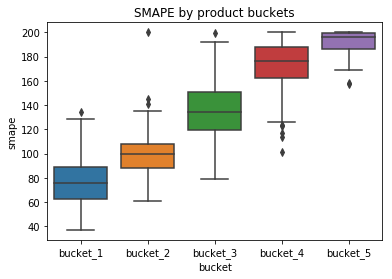

In [79]:
# concatenated_df.boxplot(column='smape', by='bucket')
sns.boxplot(x='bucket', y='smape', data=concatenated_df)
plt.title('SMAPE by product buckets')

In [14]:
import numpy as np
import pandas as pd

start = 45
scale = 12
size = 20

lgbm = np.random.normal(loc = start, scale= scale, size=size)
rf = np.random.normal(loc = start*1.22, scale= scale*1.2, size=size)
ridge_reg = np.random.normal(loc=start*1.8, scale = scale*0.8, size = size)
lasso_reg = np.random.normal(loc= start*1.5, scale = scale*0.7, size = size)


df = pd.DataFrame({'LGBM': lgbm, 'rf': rf, 'ridge': ridge_reg, 'lasso': lasso_reg})
df.to_csv('gen_results.csv', index=False)
df.describe()


,LGBM,rf,ridge,lasso
count,20.000000,20.000000,20.000000,20.000000
mean,41.553500,53.700181,81.074454,71.062421
std,12.748512,18.410229,8.905917,7.514187
min,16.135433,25.109261,65.549424,55.159616
25%,36.452718,39.930985,74.289853,66.461840
50%,42.617569,53.783032,80.036860,71.612818
75%,48.758941,69.204692,87.233379,77.105681
max,65.047538,83.780385,97.807656,84.964441
